# Credit Risk Modelling: Project
Antoni Ballaun, Laura Hoang, Jędrzej Joniec, Piotr Zambrzycki

## 02. Data preparation: finding correlations

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('filled_missings_df.csv',index_col=0)

In [16]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Defaulted
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,0,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,2,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,0,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,16,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,2,MN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0


In [19]:
pointless_cols = ['ListingKey','ListingNumber', 'LoanNumber', 'LoanStatus', 'MemberKey',  ]

In [21]:
df = df.drop(pointless_cols,axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114805 entries, 0 to 114804
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingCreationDate                 114805 non-null  object 
 1   Term                                114805 non-null  int64  
 2   BorrowerAPR                         114805 non-null  float64
 3   BorrowerRate                        114805 non-null  float64
 4   LenderYield                         114805 non-null  float64
 5   ListingCategory (numeric)           114805 non-null  int64  
 6   BorrowerState                       114805 non-null  object 
 7   EmploymentStatus                    114805 non-null  object 
 8   EmploymentStatusDuration            114805 non-null  float64
 9   IsBorrowerHomeowner                 114805 non-null  bool   
 10  CurrentlyInGroup                    114805 non-null  bool   
 11  DateCreditPulled               

<Axes: xlabel='Defaulted', ylabel='percent'>

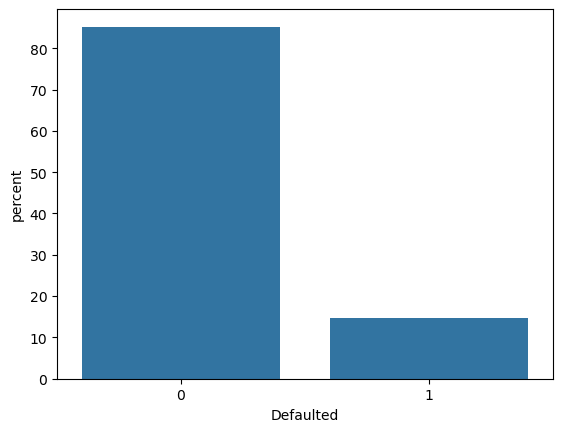

In [25]:
sns.countplot(data=df,x='Defaulted', stat='percent',)

In [27]:
df.columns

Index(['ListingCreationDate', 'Term', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ListingCategory (numeric)', 'BorrowerState',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'Loa

In [29]:
len(df.columns)

57

0 Term


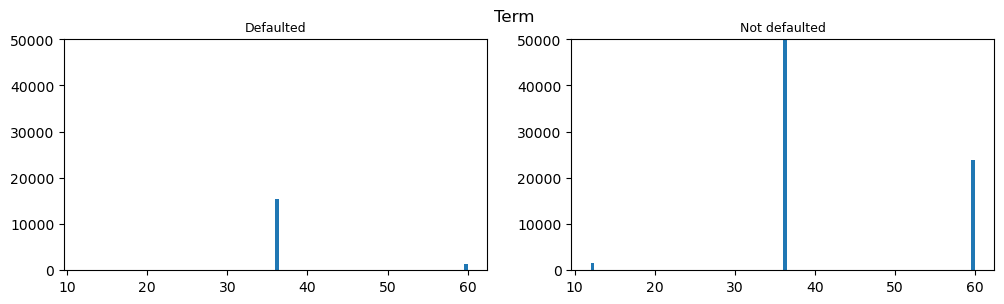

1 BorrowerAPR


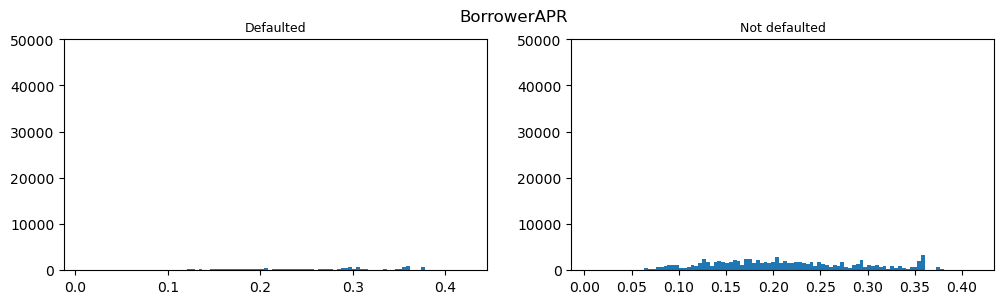

2 BorrowerRate


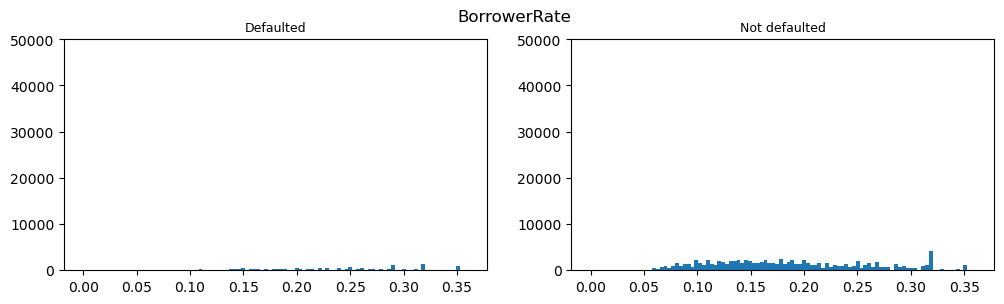

3 LenderYield


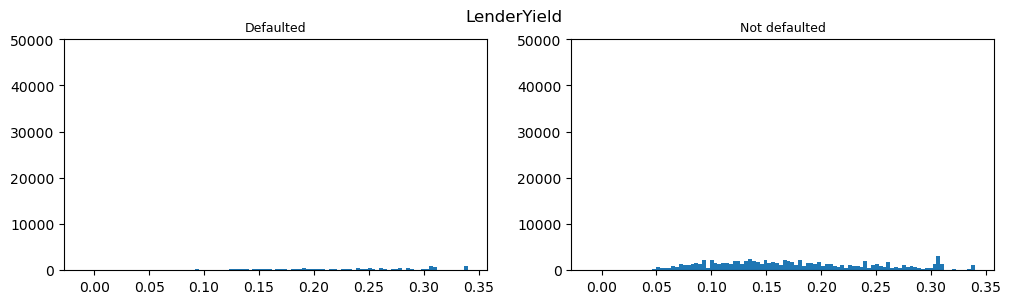

4 ListingCategory (numeric)


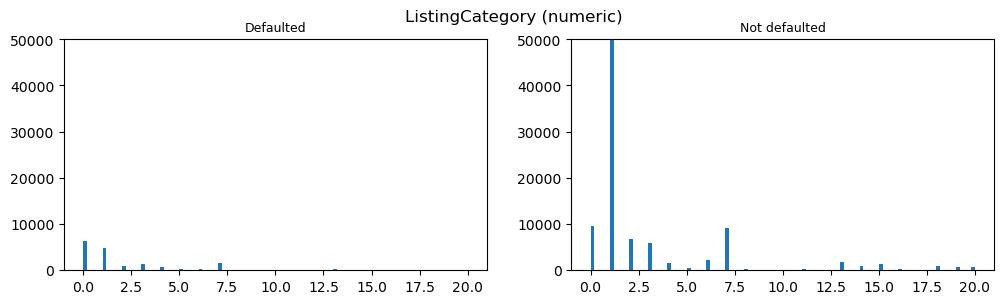

5 EmploymentStatusDuration


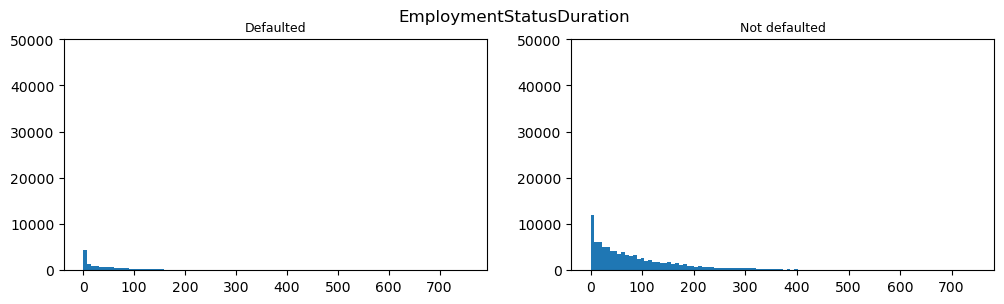

6 CreditScoreRangeLower


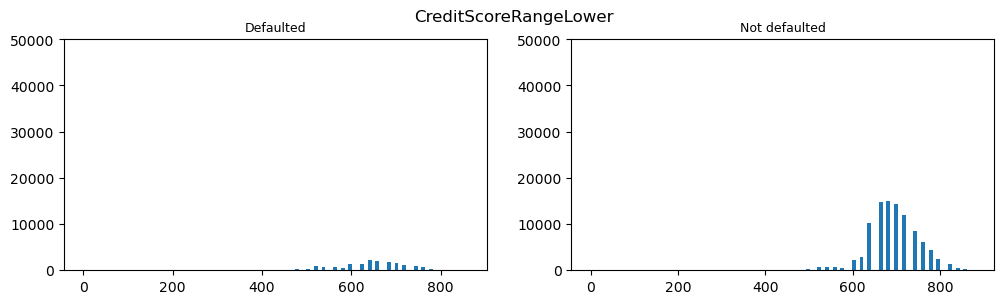

7 CreditScoreRangeUpper


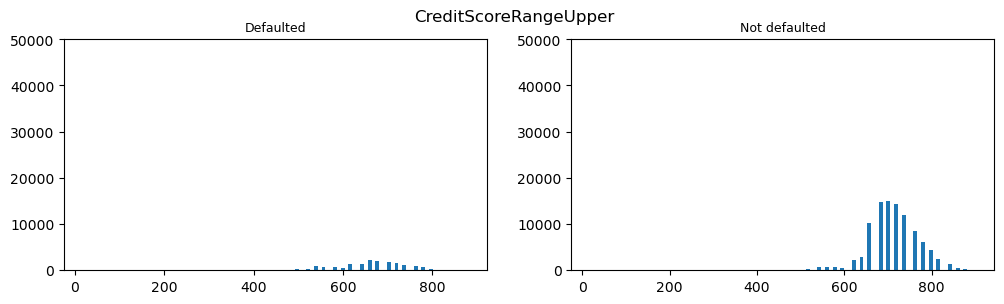

8 OpenCreditLines


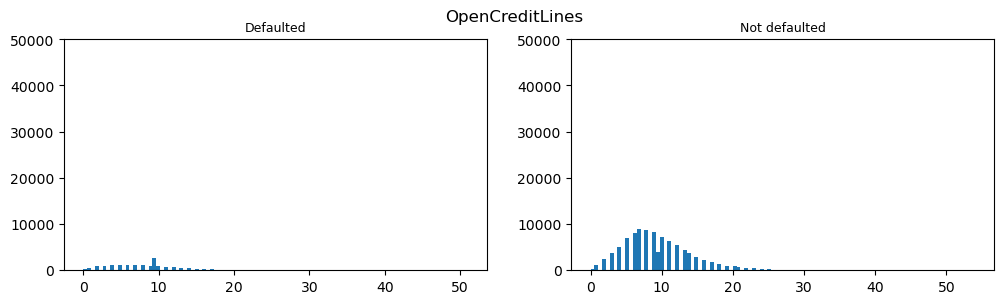

9 TotalCreditLinespast7years


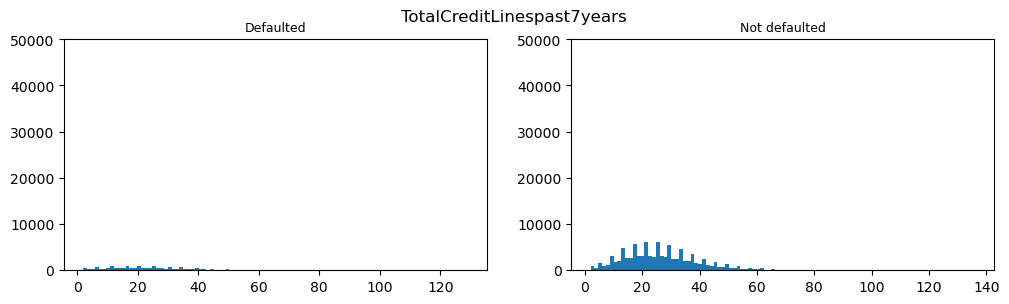

10 OpenRevolvingAccounts


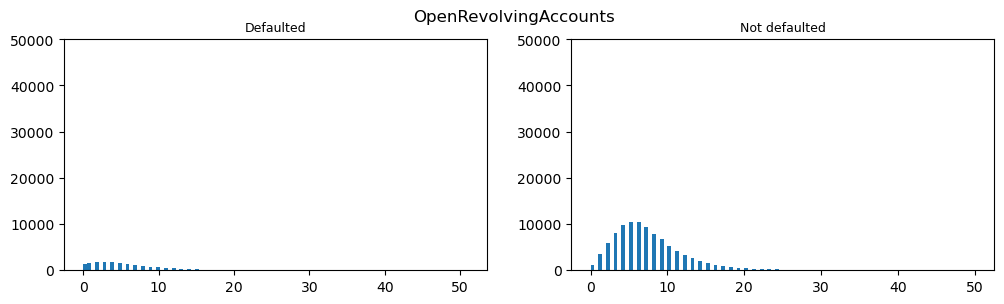

11 OpenRevolvingMonthlyPayment


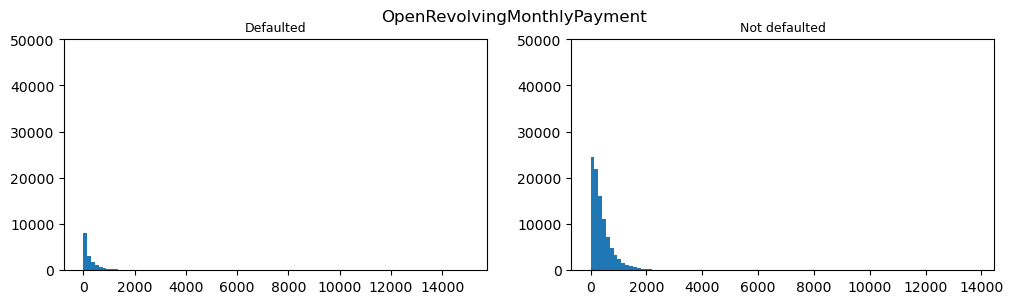

12 InquiriesLast6Months


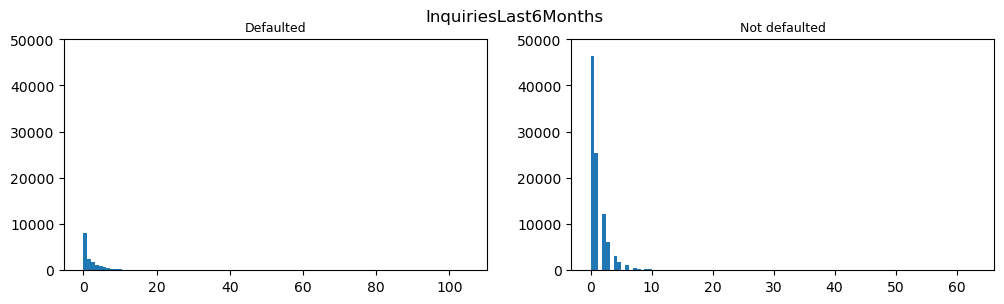

13 TotalInquiries


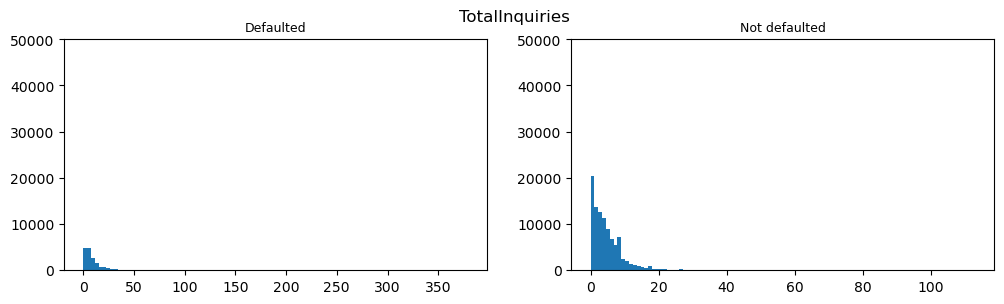

14 CurrentDelinquencies


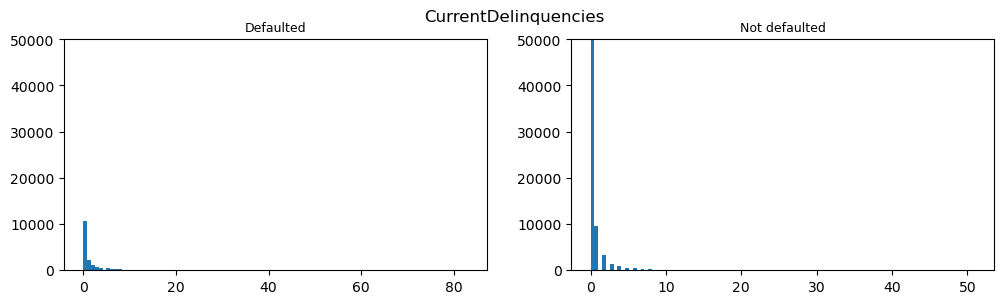

15 AmountDelinquent


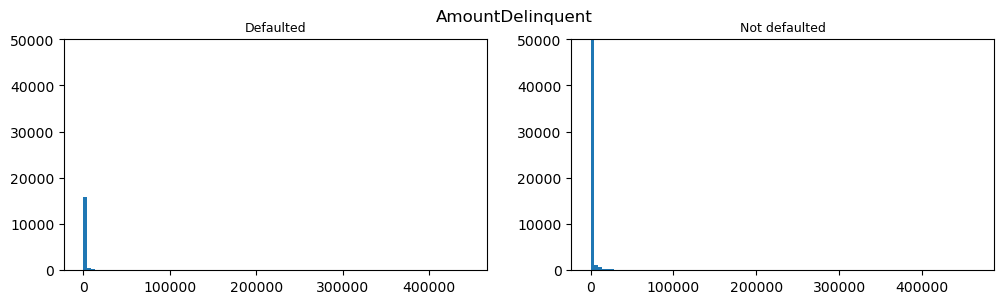

16 DelinquenciesLast7Years


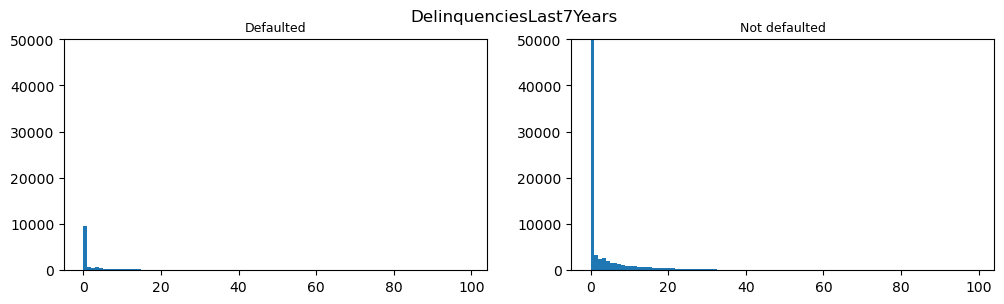

17 PublicRecordsLast10Years


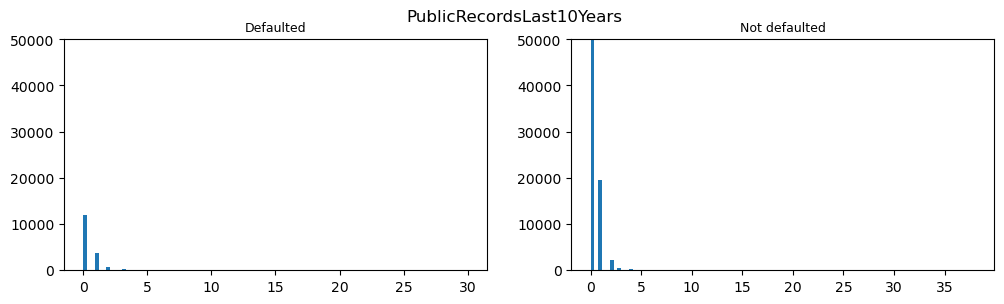

18 PublicRecordsLast12Months


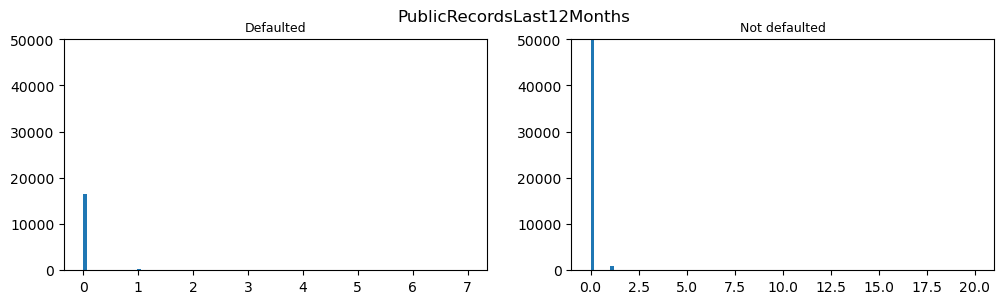

19 RevolvingCreditBalance


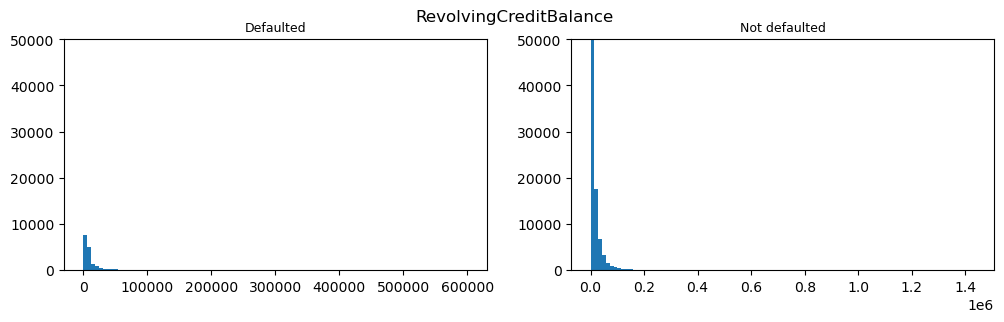

20 BankcardUtilization


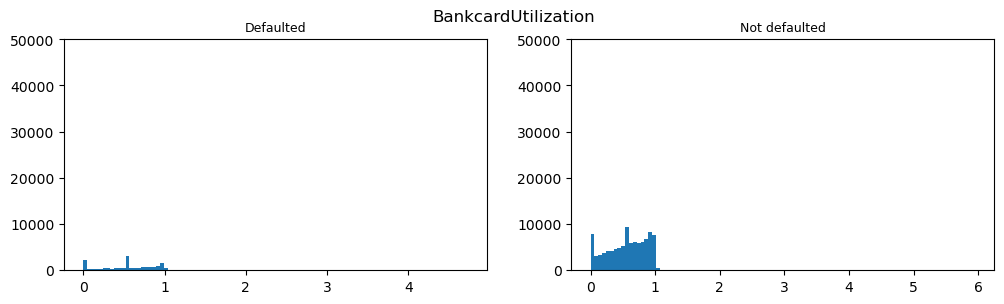

21 AvailableBankcardCredit


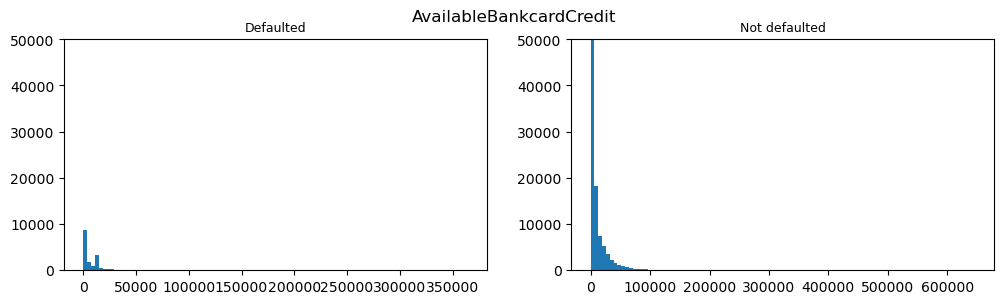

22 TotalTrades


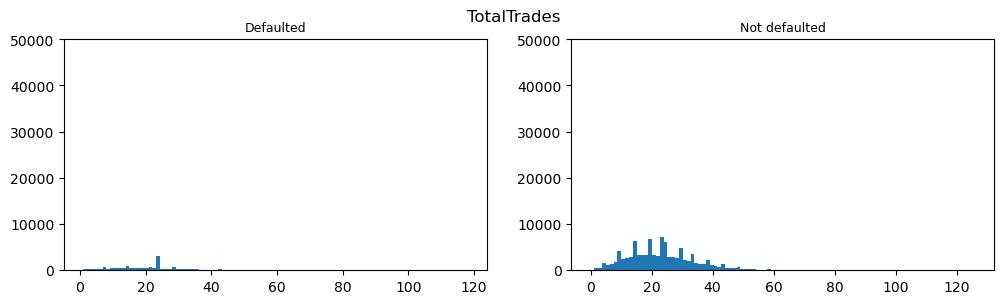

23 TradesNeverDelinquent (percentage)


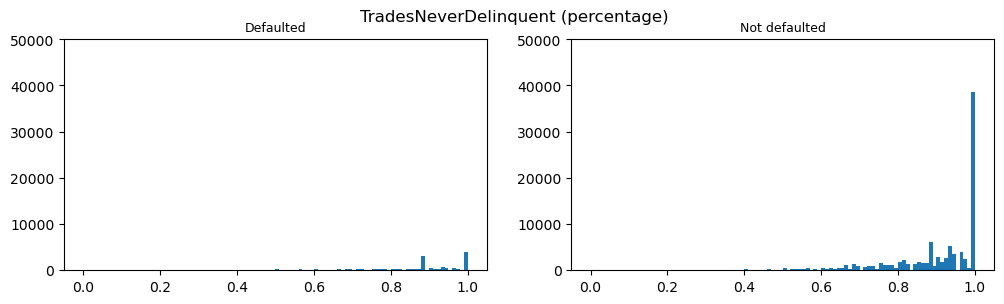

24 TradesOpenedLast6Months


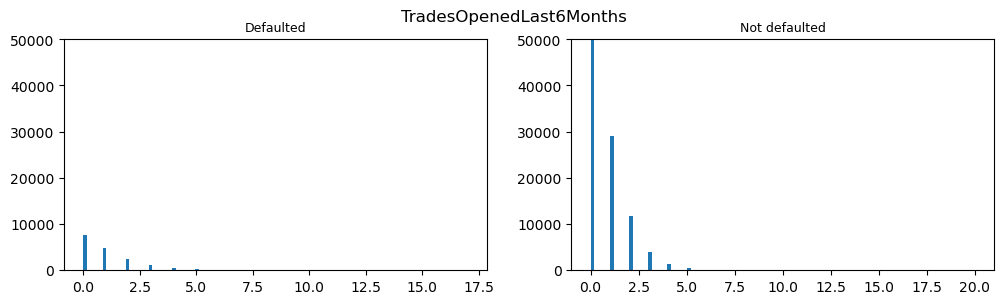

25 DebtToIncomeRatio


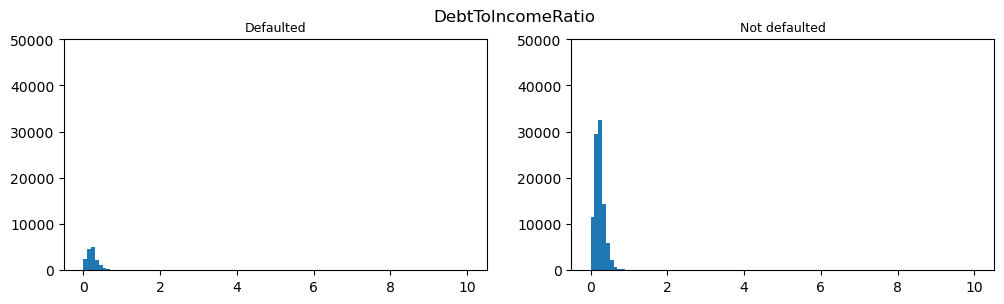

26 StatedMonthlyIncome


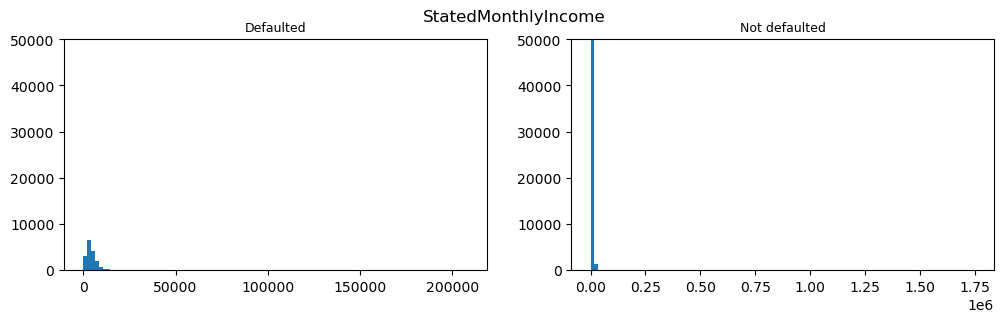

27 LoanCurrentDaysDelinquent


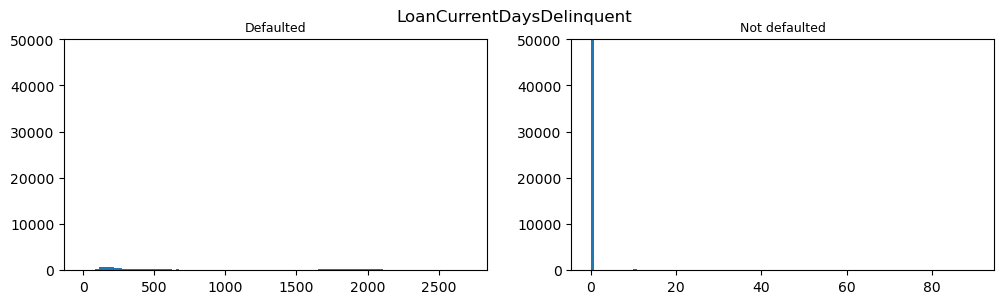

28 LoanMonthsSinceOrigination


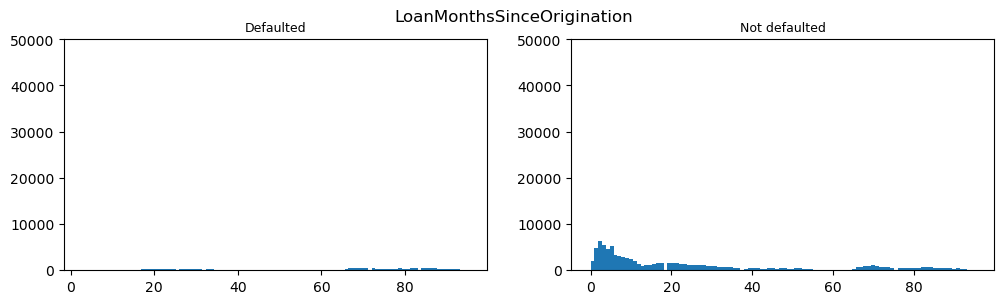

29 LoanOriginalAmount


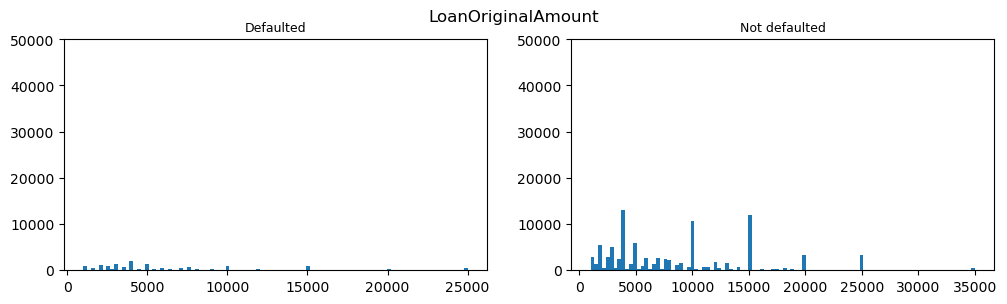

30 MonthlyLoanPayment


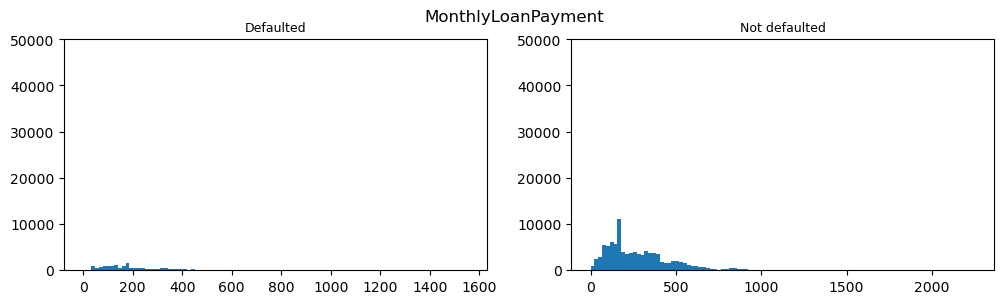

31 LP_CustomerPayments


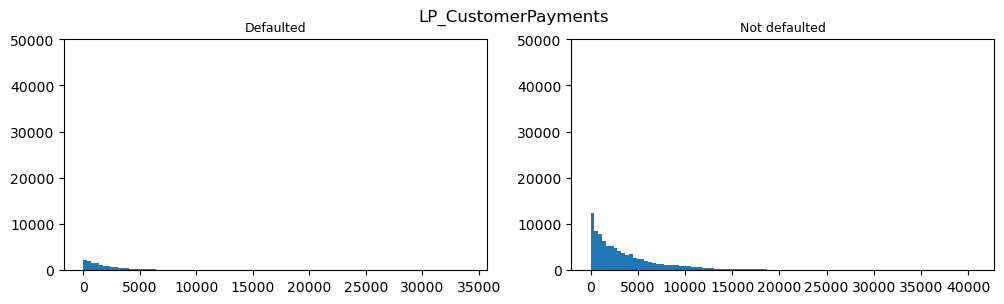

32 LP_CustomerPrincipalPayments


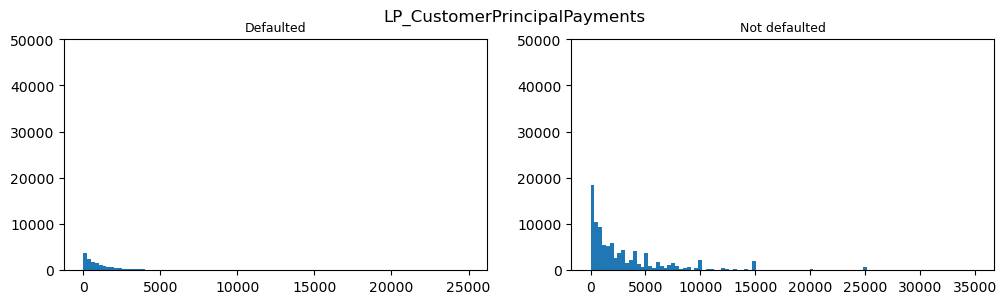

33 LP_InterestandFees


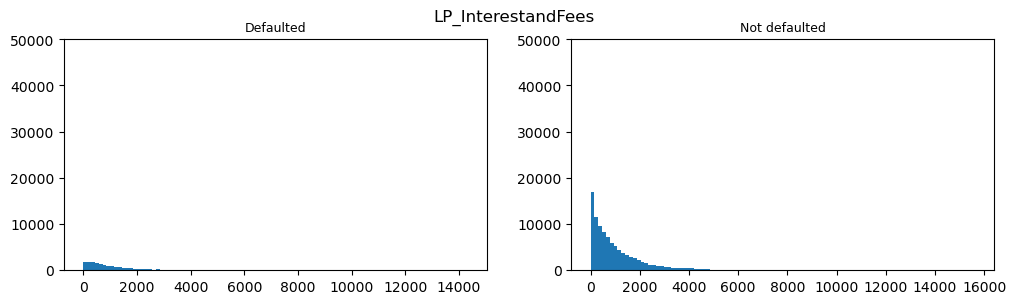

34 LP_ServiceFees


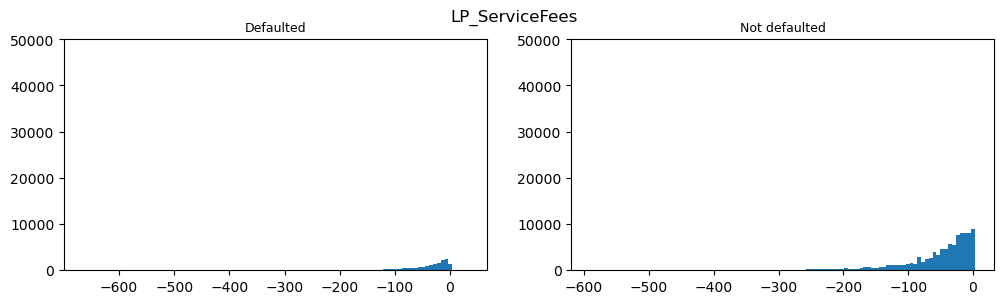

35 LP_CollectionFees


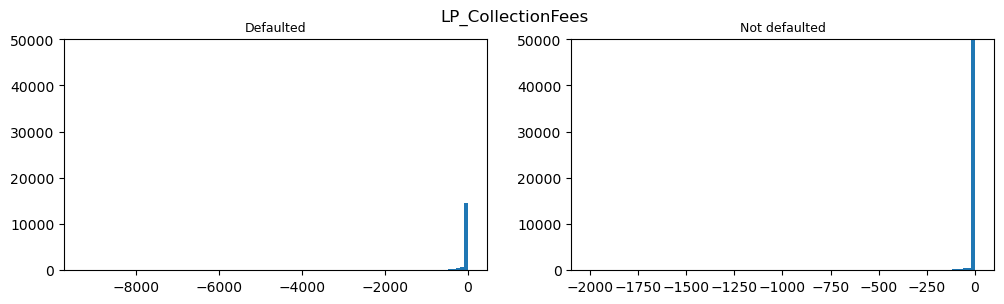

36 LP_GrossPrincipalLoss


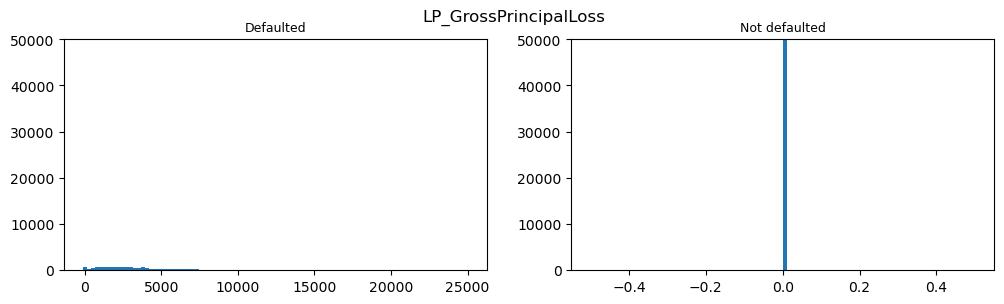

37 LP_NetPrincipalLoss


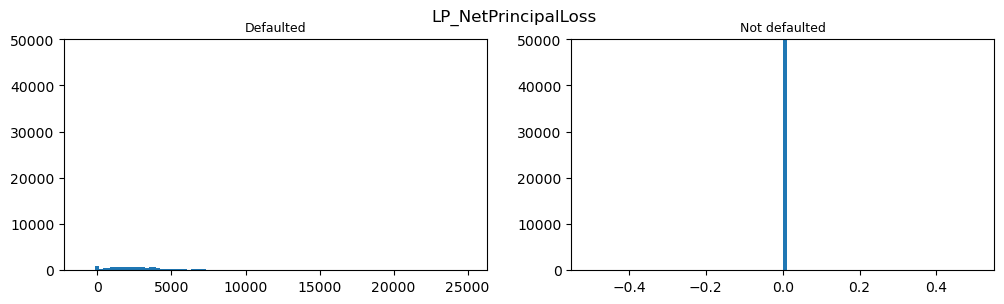

38 LP_NonPrincipalRecoverypayments


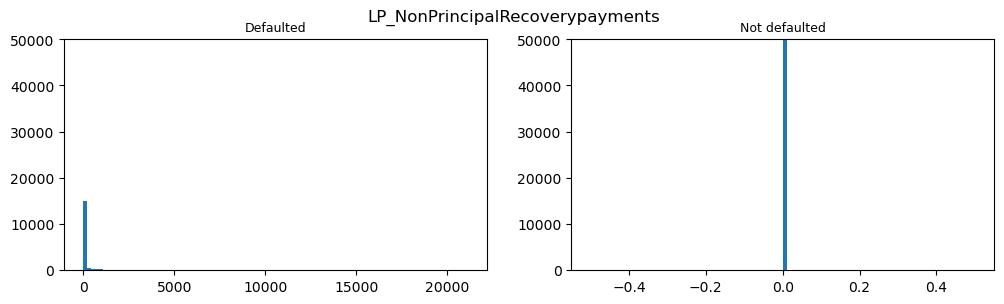

39 PercentFunded


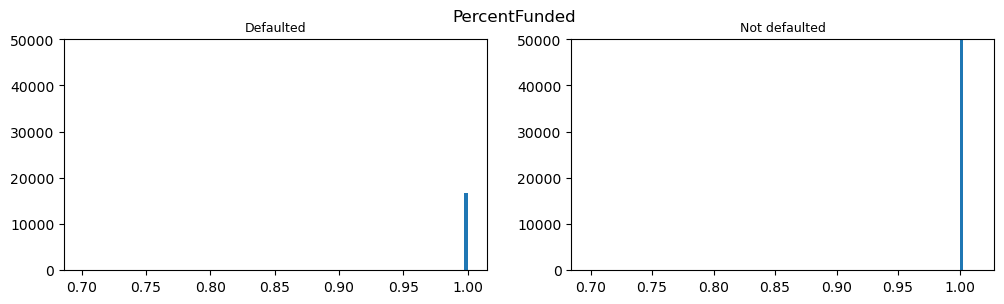

40 Recommendations


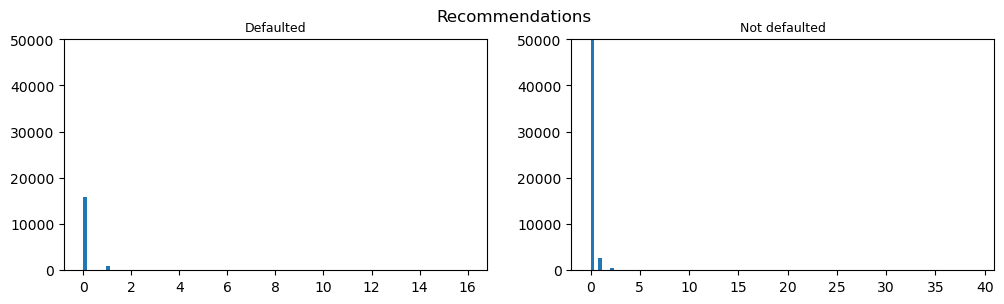

41 InvestmentFromFriendsCount


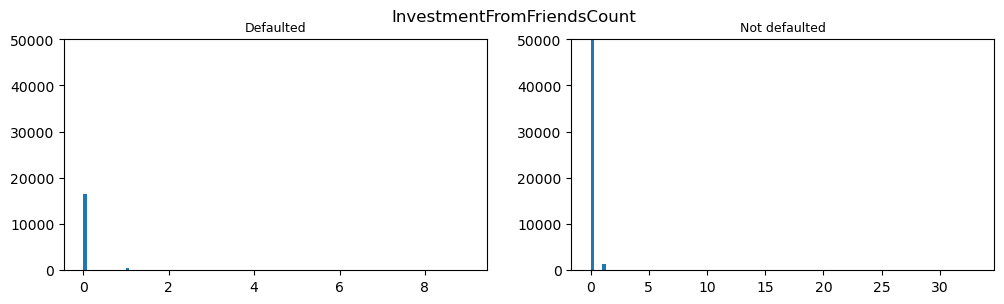

42 InvestmentFromFriendsAmount


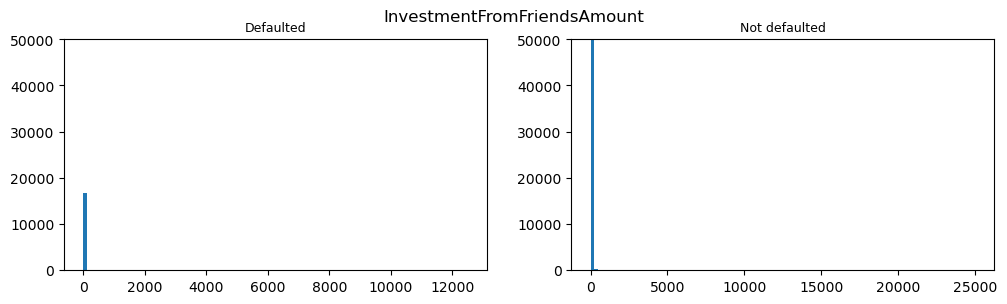

43 Investors


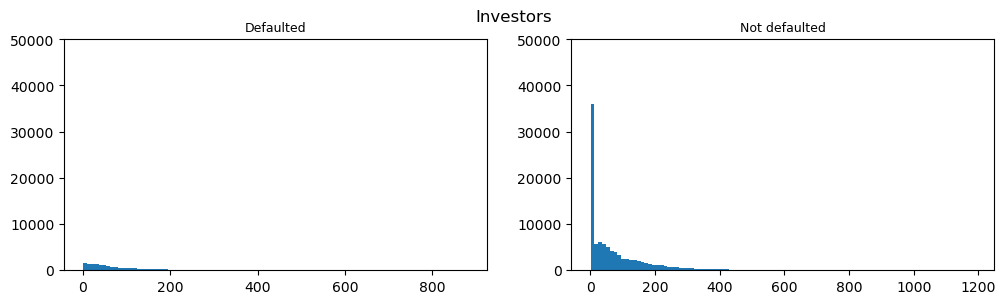

In [31]:
df_default = df[df['Defaulted']==1]
df_not_default = df[df['Defaulted']==0]

numeric_cols = df.select_dtypes(include='number').drop(columns='Defaulted').columns

for i, col in enumerate(numeric_cols):
    print(i, col)

    fig, axs = plt.subplots(1, 2, figsize=(12,3));

    axs[0].set_title('Defaulted', fontsize=9);
    axs[0].set_ylim([0,50000]);
    # axs[0].hist(x=df_default['DebtToIncomeRatio'], bins=100);
    axs[0].hist(x=df_default[col], bins=100);

    axs[1].set_title('Not defaulted', fontsize=9);
    axs[1].set_ylim([0,50000]);
    # axs[1].hist(x=df_not_default['DebtToIncomeRatio'], bins=100);
    axs[1].hist(x=df_not_default[col], bins=100);
    
    fig.suptitle(col);
    plt.show()




In [32]:
dataset = df
dataframe = dataset[numeric_cols]
dataframe["target"] = dataset.Defaulted
matrix = dataframe.corr();

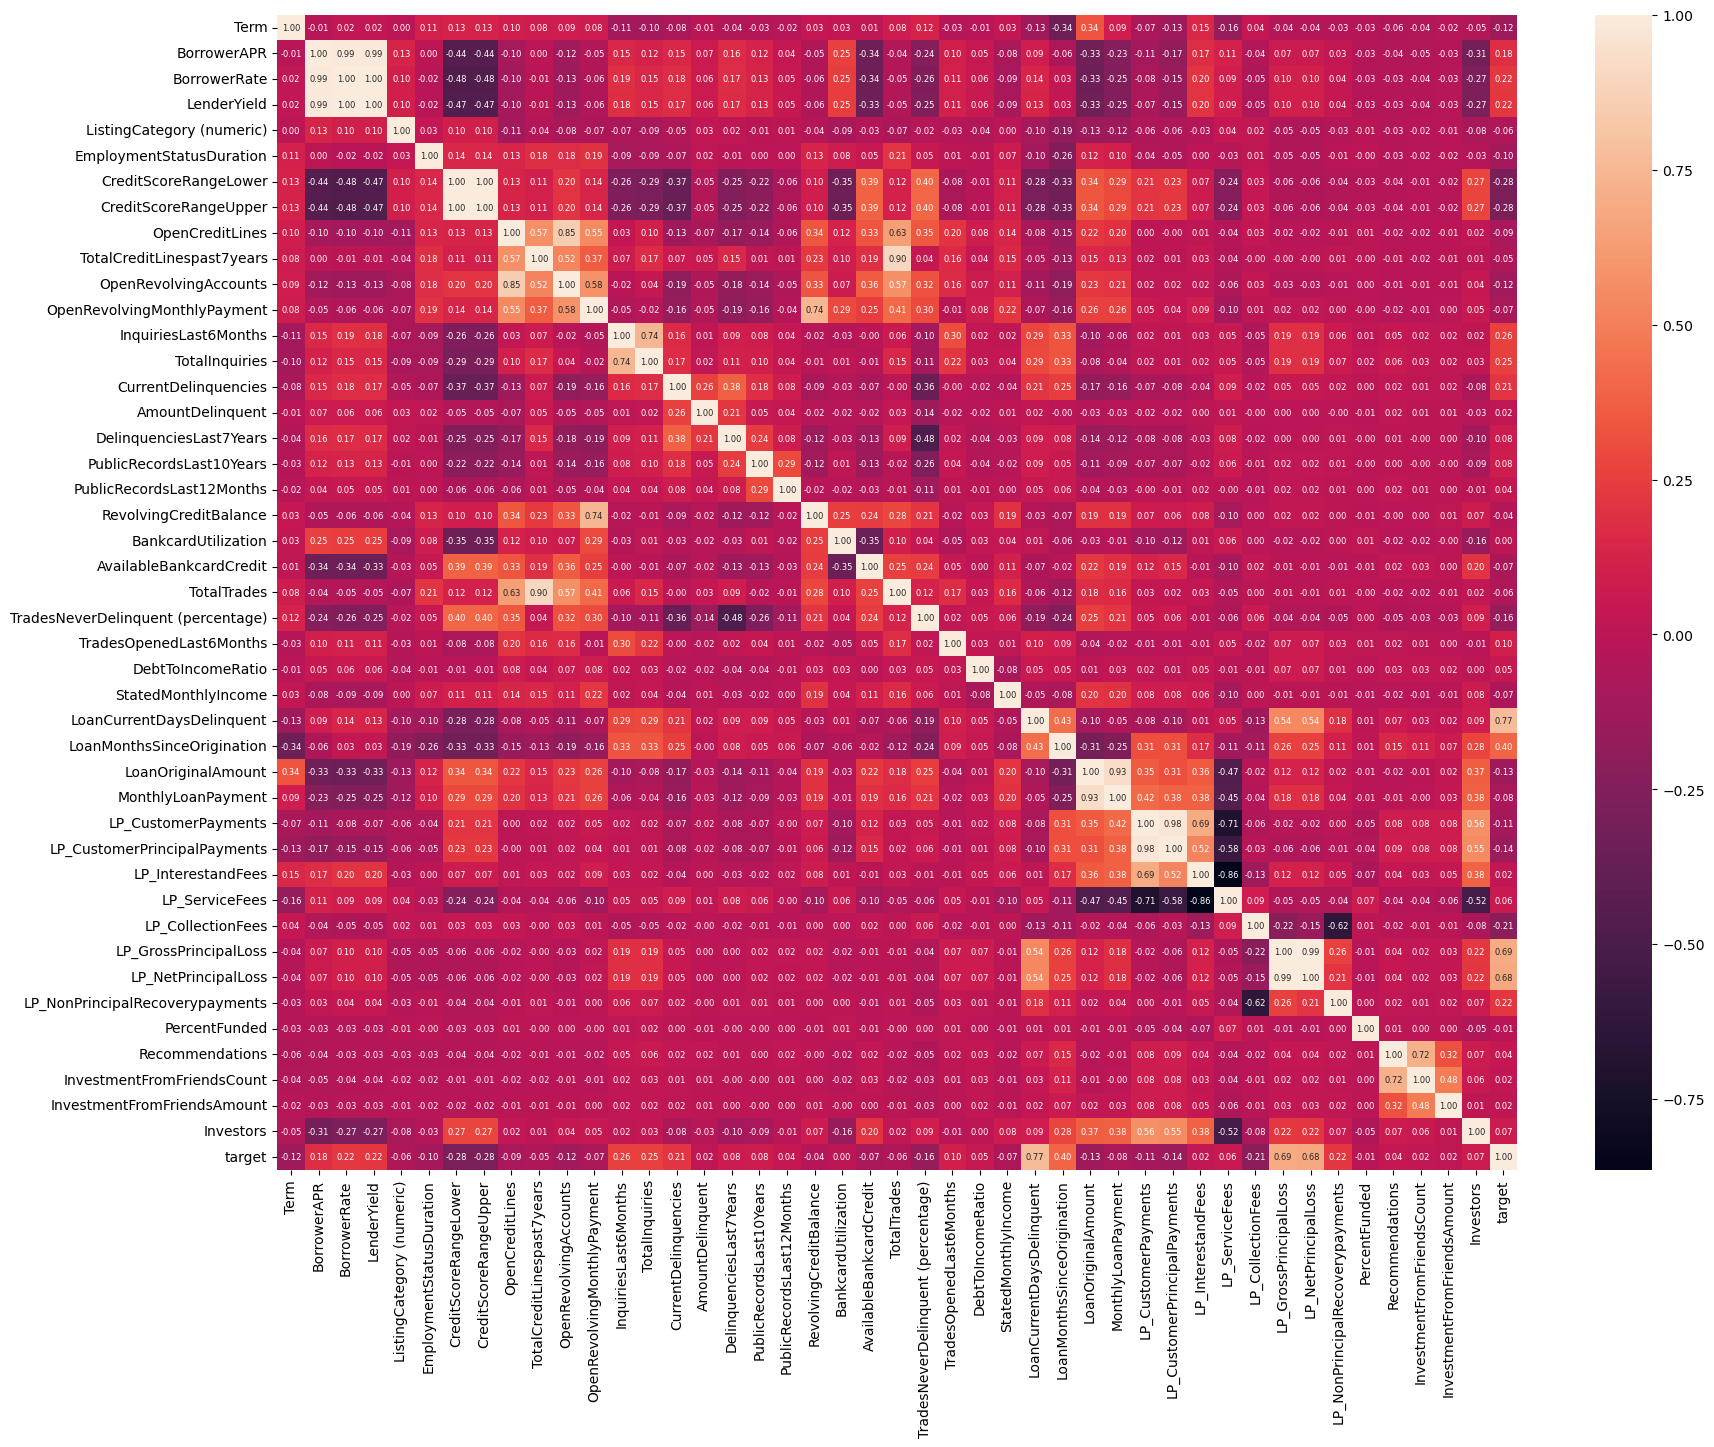

In [33]:
plt.figure(figsize=(20, 15))
# sns.heatmap(matrix, xticklabels=matrix.columns.values, yticklabels=matrix.columns.values, annot=False);
sns.heatmap(matrix, xticklabels=matrix.columns.values, yticklabels=matrix.columns.values, annot=True, fmt='.2f', annot_kws={"size":6});
plt.show()

In [41]:
!pip install missingno


In [45]:
# EDA - Eksploracyjna Analiza Danych
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline


In [55]:
# Wczytaj dane
df = pd.read_csv("C:\\Users\\zambr\\Downloads\\filled_missings_df.csv")  

# Podgląd danych
display(df.head())
print("\nRozmiar danych:", df.shape)


,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Defaulted
0,0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,0
1,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,2,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
2,2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,0
3,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,16,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
4,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,2,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0



Rozmiar danych: (114805, 63)


,Liczba brakujących,Procent brakujących


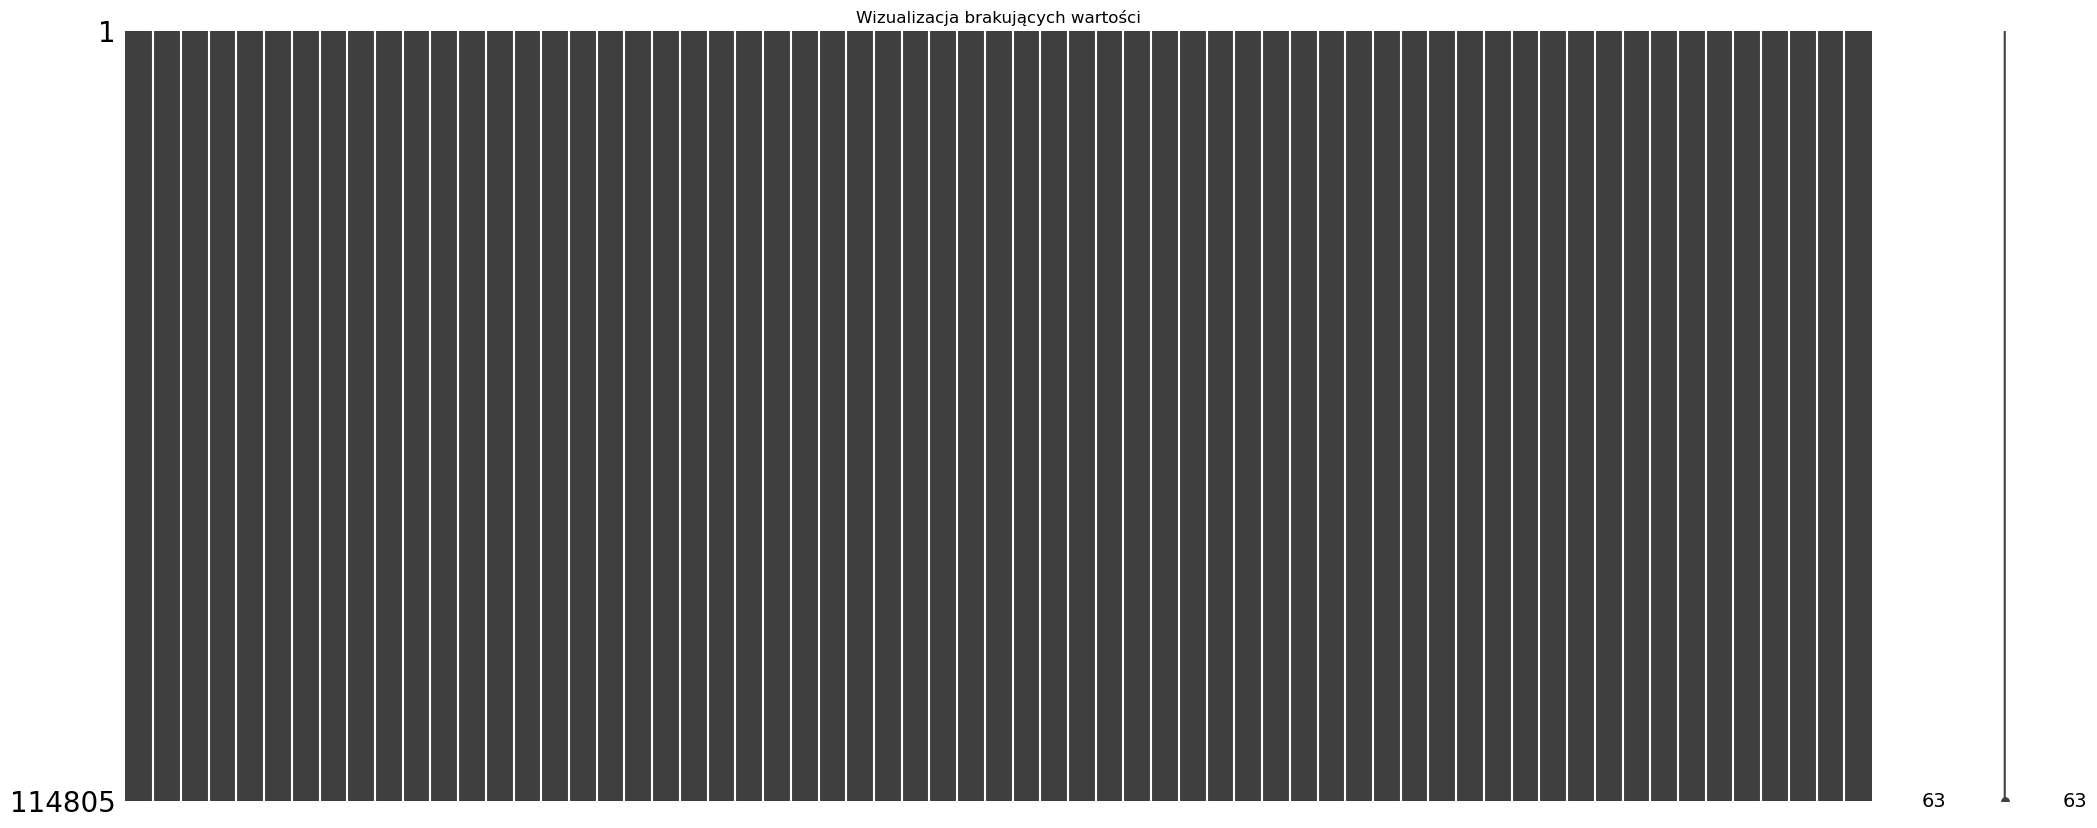

In [57]:
# Analiza brakujących wartości
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.concat([missing_values, missing_percent], axis=1)
missing_df.columns = ['Liczba brakujących', 'Procent brakujących']
display(missing_df[missing_df['Liczba brakujących'] > 0].sort_values(by='Procent brakujących', ascending=False))

# Wizualizacja braków (opcjonalnie)
msno.matrix(df)
plt.title('Wizualizacja brakujących wartości')
plt.show()


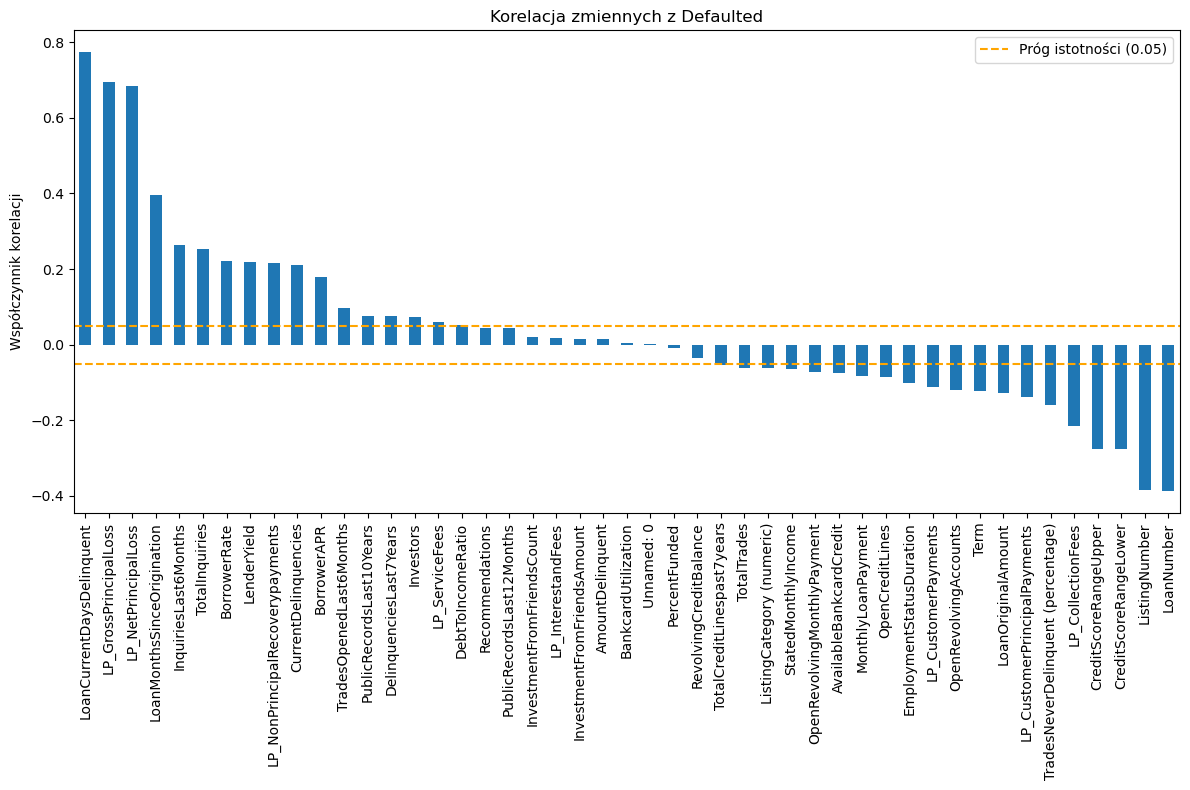

Zmienne do potencjalnego usunięcia (niska korelacja z Defaulted): ['Recommendations', 'PublicRecordsLast12Months', 'InvestmentFromFriendsCount', 'LP_InterestandFees', 'InvestmentFromFriendsAmount', 'AmountDelinquent', 'BankcardUtilization', 'Unnamed: 0', 'PercentFunded', 'RevolvingCreditBalance']


In [63]:
# Korelacje z targetem 'Defaulted'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_with_default = df[numeric_cols].corrwith(df['Defaulted']).sort_values(ascending=False)

# Wykres
plt.figure(figsize=(12, 8))
correlation_with_default.drop('Defaulted', errors='ignore').plot(kind='bar')
plt.title('Korelacja zmiennych z Defaulted')
plt.ylabel('Współczynnik korelacji')
plt.axhline(y=0.05, color='orange', linestyle='--', label='Próg istotności (0.05)')
plt.axhline(y=-0.05, color='orange', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# Lista zmiennych o niskiej korelacji
low_correlation_threshold = 0.05
low_correlation_vars = correlation_with_default[abs(correlation_with_default) < low_correlation_threshold].index.tolist()
print("Zmienne do potencjalnego usunięcia (niska korelacja z Defaulted):", low_correlation_vars)


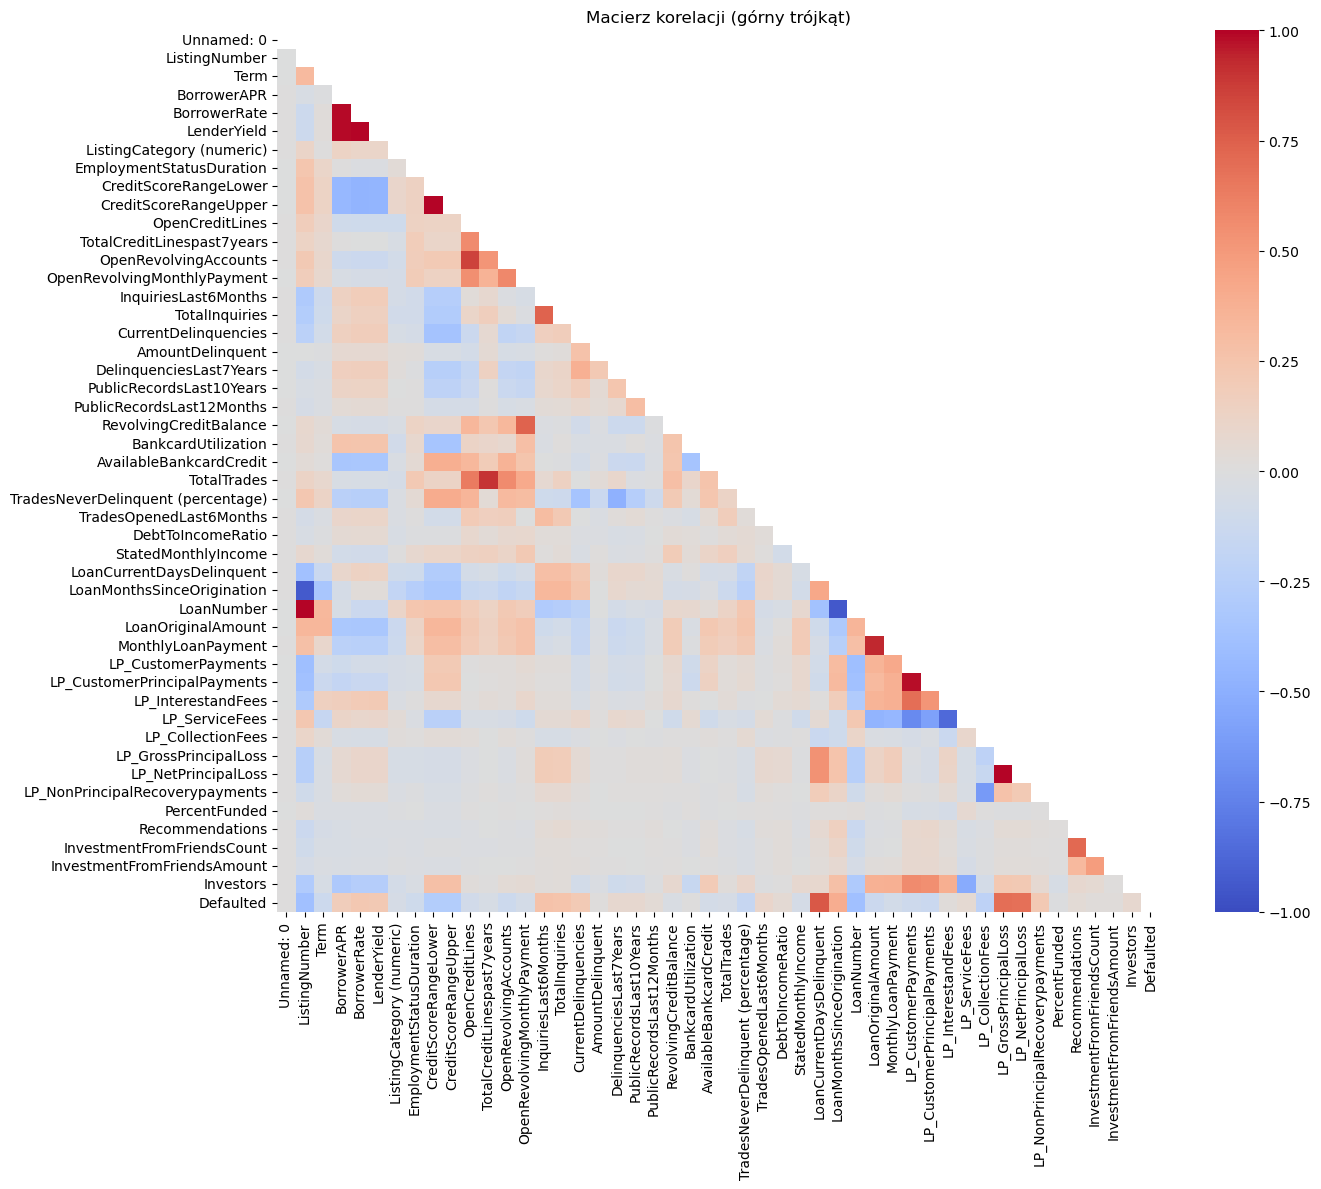

Pary zmiennych o wysokiej korelacji (powyżej 0.7):
CreditScoreRangeLower ↔ CreditScoreRangeUpper: 1.000
BorrowerRate ↔ LenderYield: 0.999
ListingNumber ↔ LoanNumber: 0.995
LP_GrossPrincipalLoss ↔ LP_NetPrincipalLoss: 0.993
BorrowerAPR ↔ BorrowerRate: 0.990
BorrowerAPR ↔ LenderYield: 0.990
LP_CustomerPayments ↔ LP_CustomerPrincipalPayments: 0.977
LoanMonthsSinceOrigination ↔ LoanNumber: -0.943
ListingNumber ↔ LoanMonthsSinceOrigination: -0.937
LoanOriginalAmount ↔ MonthlyLoanPayment: 0.932
TotalCreditLinespast7years ↔ TotalTrades: 0.905
LP_InterestandFees ↔ LP_ServiceFees: -0.864
OpenCreditLines ↔ OpenRevolvingAccounts: 0.853
LoanCurrentDaysDelinquent ↔ Defaulted: 0.774
OpenRevolvingMonthlyPayment ↔ RevolvingCreditBalance: 0.742
InquiriesLast6Months ↔ TotalInquiries: 0.738
Recommendations ↔ InvestmentFromFriendsCount: 0.718
LP_CustomerPayments ↔ LP_ServiceFees: -0.706


In [65]:
# Macierz korelacji między zmiennymi
correlation_matrix = df[numeric_cols].corr()

# Wizualizacja (tylko górny trójkąt)
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Maska na górny trójkąt
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz korelacji (górny trójkąt)')
plt.tight_layout()
plt.show()

# Znajdź pary zmiennych o wysokiej korelacji
high_corr_threshold = 0.7
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

# Wyświetl pary
print(f"Pary zmiennych o wysokiej korelacji (powyżej {high_corr_threshold}):")
for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} ↔ {var2}: {corr:.3f}")


In [69]:
print(f"Pary zmiennych o wysokiej korelacji (powyżej {high_corr_threshold}):")
for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} ↔ {var2}: {corr:.3f}")


Pary zmiennych o wysokiej korelacji (powyżej 0.7):
CreditScoreRangeLower ↔ CreditScoreRangeUpper: 1.000
BorrowerRate ↔ LenderYield: 0.999
ListingNumber ↔ LoanNumber: 0.995
LP_GrossPrincipalLoss ↔ LP_NetPrincipalLoss: 0.993
BorrowerAPR ↔ BorrowerRate: 0.990
BorrowerAPR ↔ LenderYield: 0.990
LP_CustomerPayments ↔ LP_CustomerPrincipalPayments: 0.977
LoanMonthsSinceOrigination ↔ LoanNumber: -0.943
ListingNumber ↔ LoanMonthsSinceOrigination: -0.937
LoanOriginalAmount ↔ MonthlyLoanPayment: 0.932
TotalCreditLinespast7years ↔ TotalTrades: 0.905
LP_InterestandFees ↔ LP_ServiceFees: -0.864
OpenCreditLines ↔ OpenRevolvingAccounts: 0.853
LoanCurrentDaysDelinquent ↔ Defaulted: 0.774
OpenRevolvingMonthlyPayment ↔ RevolvingCreditBalance: 0.742
InquiriesLast6Months ↔ TotalInquiries: 0.738
Recommendations ↔ InvestmentFromFriendsCount: 0.718
LP_CustomerPayments ↔ LP_ServiceFees: -0.706


In [71]:
# Najpierw oblicz korelację wszystkich zmiennych z Defaulted (jeśli jeszcze nie masz tej informacji)
correlation_with_defaulted = df[numeric_cols].corrwith(df['Defaulted']).sort_values(ascending=False)

# Utwórz tabelę porównawczą dla par o wysokiej korelacji
print(f"{'Zmienna 1':<30} {'Korelacja z Defaulted':<20} | {'Zmienna 2':<30} {'Korelacja z Defaulted':<20} | {'Korelacja między zmiennymi':<15}")
print('-'*110)

for var1, var2, corr in high_corr_pairs:
    corr_var1 = correlation_with_defaulted.get(var1, 0)
    corr_var2 = correlation_with_defaulted.get(var2, 0)
    print(f"{var1:<30} {corr_var1:< 20.3f} | {var2:<30} {corr_var2:< 20.3f} | {corr:<15.3f}")


Zmienna 1                      Korelacja z Defaulted | Zmienna 2                      Korelacja z Defaulted | Korelacja między zmiennymi
--------------------------------------------------------------------------------------------------------------
ListingNumber                  -0.385               | LoanMonthsSinceOrigination      0.395               | -0.937         
ListingNumber                  -0.385               | LoanNumber                     -0.387               | 0.995          
BorrowerAPR                     0.178               | BorrowerRate                    0.221               | 0.990          
BorrowerAPR                     0.178               | LenderYield                     0.218               | 0.990          
BorrowerRate                    0.221               | LenderYield                     0.218               | 0.999          
CreditScoreRangeLower          -0.277               | CreditScoreRangeUpper          -0.277               | 1.000          
OpenCred

In [73]:
# Podział zmiennych na kategorie
continuous_vars = []  # Zmienne ciągłe
discrete_ordered_vars = []  # Zmienne dyskretne uporządkowane
categorical_unordered_vars = []  # Zmienne kategoryczne nieuporządkowane

for col in df.columns:
    # Sprawdzenie typu danych
    if df[col].dtype in ['int64', 'float64']:
        n_unique = df[col].nunique()
        # Zmienne z dużą liczbą unikalnych wartości są prawdopodobnie ciągłe
        if n_unique > 10 and n_unique / len(df) > 0.05:
            continuous_vars.append(col)
        else:
            # Zmienne dyskretne (ordered)
            discrete_ordered_vars.append(col)
    else:
        # Zmienne nieliczbowe - kategoryczne (unordered)
        categorical_unordered_vars.append(col)

print("Zmienne ciągłe:", continuous_vars)
print("Zmienne dyskretne (ordered):", discrete_ordered_vars)
print("Zmienne kategoryczne (unordered):", categorical_unordered_vars)


Zmienne ciągłe: ['Unnamed: 0', 'ListingNumber', 'BorrowerAPR', 'AmountDelinquent', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'StatedMonthlyIncome', 'LoanNumber', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss']
Zmienne dyskretne (ordered): ['Term', 'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'BankcardUtilization', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'LP_N

In [75]:
# 1. SPRAWDZENIE KOLUMN IDENTYFIKACYJNYCH
ident_columns = ['ListingKey', 'LoanKey', 'MemberKey']

# Sprawdź unikalność kolumn identyfikacyjnych
unique_counts = {col: df[col].nunique() for col in ident_columns}
unique_percent = {col: df[col].nunique()/len(df)*100 for col in ident_columns}

print("1. ANALIZA KOLUMN IDENTYFIKACYJNYCH:")
print("\nLiczba unikalnych wartości:")
for col, count in unique_counts.items():
    print(f"{col}: {count} unikalnych wartości ({unique_percent[col]:.2f}% rekordów)")

1. ANALIZA KOLUMN IDENTYFIKACYJNYCH:

Liczba unikalnych wartości:
ListingKey: 112074 unikalnych wartości (97.62% rekordów)
LoanKey: 112074 unikalnych wartości (97.62% rekordów)
MemberKey: 90053 unikalnych wartości (78.44% rekordów)


In [77]:
# Sprawdź korelację (jeśli kolumny są numeryczne) lub związek z defaultem
print("\nZwiązek z Defaulted:")
for col in ident_columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        corr = df[col].corr(df['Defaulted'])
        print(f"{col}: korelacja z Defaulted = {corr:.4f}")
    else:
        # Dla kolumn nienumerycznych sprawdź średnią wartość Defaulted dla każdej wartości identyfikatora
        default_rates = df.groupby(col)['Defaulted'].mean()
        var = default_rates.var()
        print(f"{col}: wariancja średnich wartości Defaulted = {var:.6f}")
        # Jeśli wariancja bliska 0, kolumna identyfikacyjna nie ma związku z targetem


Związek z Defaulted:
ListingKey: wariancja średnich wartości Defaulted = 0.128597
LoanKey: wariancja średnich wartości Defaulted = 0.128597
MemberKey: wariancja średnich wartości Defaulted = 0.135172




2. ANALIZA POTENCJALNEGO WYCIEKU DANYCH:

Korelacja LoanCurrentDaysDelinquent z Defaulted: 0.7737


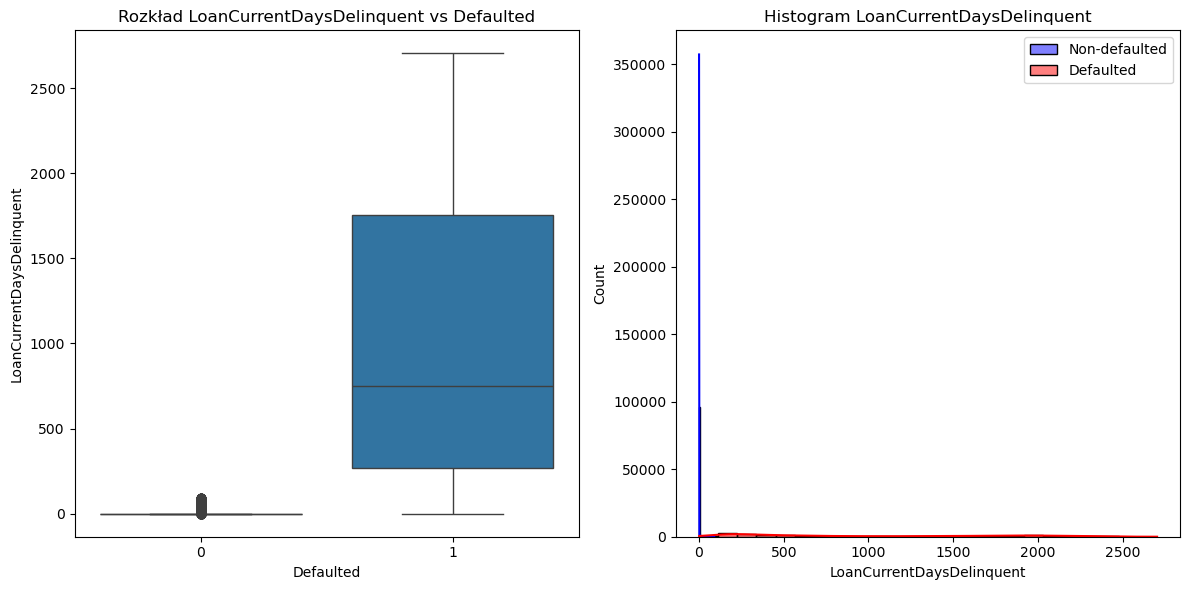

In [79]:
# 2. SPRAWDZENIE POTENCJALNEGO WYCIEKU DANYCH
print("\n\n2. ANALIZA POTENCJALNEGO WYCIEKU DANYCH:")

# Sprawdź dokładnie korelację LoanCurrentDaysDelinquent z Defaulted
corr_delinq = df['LoanCurrentDaysDelinquent'].corr(df['Defaulted'])
print(f"\nKorelacja LoanCurrentDaysDelinquent z Defaulted: {corr_delinq:.4f}")

# Porównaj rozkłady LoanCurrentDaysDelinquent dla przypadków Defaulted=0 i Defaulted=1
plt.figure(figsize=(12, 6))

# Podwykres 1: Rozkład wartości dla defaulted vs non-defaulted
plt.subplot(1, 2, 1)
sns.boxplot(x='Defaulted', y='LoanCurrentDaysDelinquent', data=df)
plt.title('Rozkład LoanCurrentDaysDelinquent vs Defaulted')
plt.ylabel('LoanCurrentDaysDelinquent')

# Podwykres 2: Histogram wartości LoanCurrentDaysDelinquent dla defaulted/non-defaulted
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['Defaulted']==0], x='LoanCurrentDaysDelinquent', color='blue', 
             alpha=0.5, label='Non-defaulted', kde=True)
sns.histplot(data=df[df['Defaulted']==1], x='LoanCurrentDaysDelinquent', color='red', 
             alpha=0.5, label='Defaulted', kde=True)
plt.title('Histogram LoanCurrentDaysDelinquent')
plt.xlabel('LoanCurrentDaysDelinquent')
plt.legend()

plt.tight_layout()
plt.show()

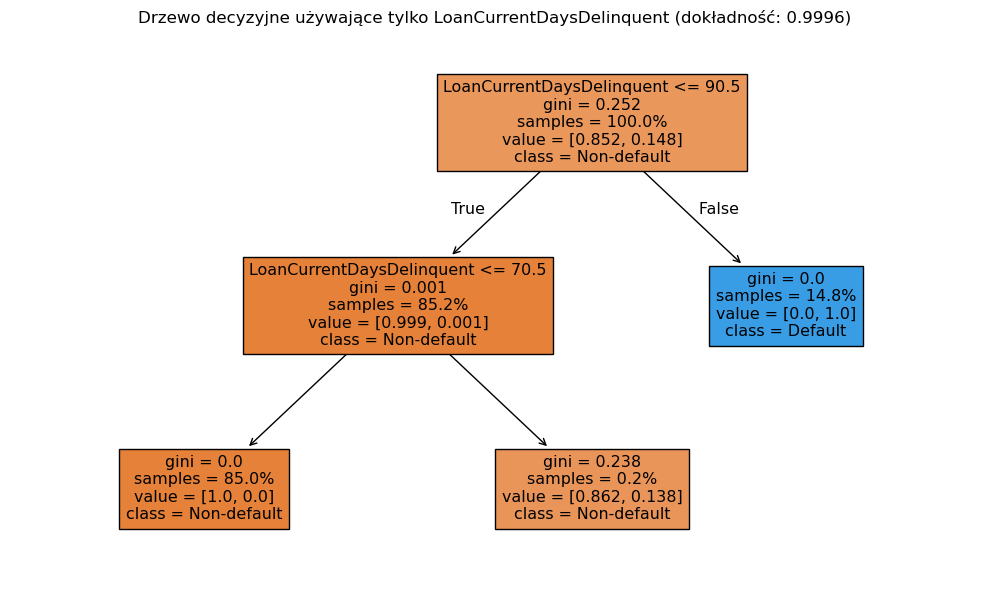


Dokładność klasyfikacji używając tylko LoanCurrentDaysDelinquent: 0.9996


In [83]:
# Sprawdź, czy LoanCurrentDaysDelinquent rozdziela dobrze klasy
# Zbuduj płytkie drzewo decyzyjne używając tylko LoanCurrentDaysDelinquent
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X = df[['LoanCurrentDaysDelinquent']]
y = df['Defaulted']

# Budujemy bardzo płytkie drzewo (max_depth=2) aby sprawdzić czy
# jedna zmienna dobrze rozdziela klasy
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

# Oblicz dokładność predykcji
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

# Narysuj drzewo
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['LoanCurrentDaysDelinquent'], 
          class_names=['Non-default', 'Default'], proportion=True)
plt.title(f'Drzewo decyzyjne używające tylko LoanCurrentDaysDelinquent (dokładność: {accuracy:.4f})')
plt.tight_layout()
plt.show()

print(f"\nDokładność klasyfikacji używając tylko LoanCurrentDaysDelinquent: {accuracy:.4f}")


In [85]:
# Usuwanie zmiennych z wysoką korelacją między sobą - zostawiamy zmienną z wyższą korelacją z Defaulted
variables_to_drop_corr = [
    'ListingNumber',      # silnie skorelowany z LoanMonthsSinceOrigination (-0.937) i LoanNumber (0.995)
    'BorrowerAPR',        # silnie skorelowany z BorrowerRate (0.990) i LenderYield (0.990)
    'LenderYield',        # silnie skorelowany z BorrowerRate (0.999)
    'CreditScoreRangeLower', # idealnie skorelowany z CreditScoreRangeUpper (1.000)
    'OpenCreditLines',    # silnie skorelowany z OpenRevolvingAccounts (0.853)
    'TotalCreditLinespast7years', # silnie skorelowany z TotalTrades (0.905)
    'LP_NetPrincipalLoss' # silnie skorelowany z LP_GrossPrincipalLoss (0.993)
]


In [87]:
# Usuwanie zmiennej z wyciekiem danych (data leakage)
data_leakage_vars = [
    'LoanCurrentDaysDelinquent'  # dokładność drzewa decyzyjnego 0.9996
]


In [89]:
# Usuwanie zmiennych o niskiej korelacji z Defaulted (< 0.05)
low_corr_vars = [var for var in correlation_with_defaulted.index 
                if abs(correlation_with_defaulted[var]) < 0.05]

print("Zmienne o niskiej korelacji z Defaulted:")
print(low_corr_vars)


Zmienne o niskiej korelacji z Defaulted:
['Recommendations', 'PublicRecordsLast12Months', 'InvestmentFromFriendsCount', 'LP_InterestandFees', 'InvestmentFromFriendsAmount', 'AmountDelinquent', 'BankcardUtilization', 'Unnamed: 0', 'PercentFunded', 'RevolvingCreditBalance']


In [91]:
# Połączenie wszystkich list zmiennych do usunięcia
all_vars_to_drop = list(set(variables_to_drop_corr + data_leakage_vars + low_corr_vars))

# Usunięcie zmiennych
df_cleaned = df.drop(columns=all_vars_to_drop)

# Sprawdzenie rezultatu
print(f"Oryginalna liczba zmiennych: {df.shape[1]}")
print(f"Liczba zmiennych po usunięciu: {df_cleaned.shape[1]}")
print(f"Usunięto {df.shape[1] - df_cleaned.shape[1]} zmiennych")

# Zapisanie oczyszczonego zbioru danych
df_cleaned.to_csv('cleaned_data.csv', index=False)


Oryginalna liczba zmiennych: 63
Liczba zmiennych po usunięciu: 45
Usunięto 18 zmiennych
